In [3]:
import pandas as pd
import os
import numpy as np
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D


Load train & test file


In [6]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = 'train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)
    
folder = 'train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


In [7]:
img_width, img_height = 48,48
train_data_dir = 'train_data/train'
validation_data_dir = 'train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

In [8]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [9]:
for layer in model.layers[:10]:
    layer.traiable = False

In [12]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy', 
                    optimizer = optimizers.SGD(learning_rate = 0.0001, momentum=0.9), 
                    metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [16]:
history = model_final.fit(
    train_generator, 
    steps_per_epoch=nb_train_sample // batch_size, 
    validation_data=validation_generator, 
    validation_steps=nb_validation_sample // batch_size, 
    epochs=epochs
)

Epoch 1/15


d:\anaconda\envs\newenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 635ms/step - accuracy: 0.7429 - loss: 0.5942 - val_accuracy: 0.7688 - val_loss: 0.4837
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8125 - loss: 0.3883 - val_accuracy: 0.7500 - val_loss: 0.5440
Epoch 3/15


d:\anaconda\envs\newenv\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 495ms/step - accuracy: 0.7979 - loss: 0.3838 - val_accuracy: 0.8813 - val_loss: 0.3246
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9062 - loss: 0.2701 - val_accuracy: 0.7500 - val_loss: 0.3483
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 515ms/step - accuracy: 0.9438 - loss: 0.2446 - val_accuracy: 0.9062 - val_loss: 0.2403
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.1111 - val_accuracy: 0.7500 - val_loss: 0.3059
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 497ms/step - accuracy: 0.9607 - loss: 0.1554 - val_accuracy: 0.9062 - val_loss: 0.2325
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0771 - val_accuracy: 1.0000 - val_loss: 0.1198
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 487ms/step - accuracy: 0.9813 - loss: 0.1072 - val_accuracy: 0.9187 - val_loss: 0.1774
Epoch 10/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9688 - loss: 0.0794 - val_accuracy: 0.7500 - val_loss: 0

In [17]:
history.history

{'accuracy': [0.7599999904632568,
  0.8125,
  0.7975000143051147,
  0.90625,
  0.9375,
  1.0,
  0.9574999809265137,
  1.0,
  0.9775000214576721,
  0.96875,
  0.9775000214576721,
  0.96875,
  0.9825000166893005,
  0.90625,
  0.9850000143051147],
 'loss': [0.5544265508651733,
  0.3882637023925781,
  0.36314159631729126,
  0.27005159854888916,
  0.23543846607208252,
  0.11106261610984802,
  0.15818919241428375,
  0.07712233066558838,
  0.11099043488502502,
  0.07940930128097534,
  0.08048115670681,
  0.146104633808136,
  0.06931911408901215,
  0.12356921285390854,
  0.056765589863061905],
 'val_accuracy': [0.768750011920929,
  0.75,
  0.8812500238418579,
  0.75,
  0.90625,
  0.75,
  0.90625,
  1.0,
  0.918749988079071,
  0.75,
  0.90625,
  1.0,
  0.925000011920929,
  0.75,
  0.8999999761581421],
 'val_loss': [0.48370665311813354,
  0.5439897775650024,
  0.3245556950569153,
  0.3482509255409241,
  0.2402816265821457,
  0.30589932203292847,
  0.2325228750705719,
  0.11980656534433365,
  0.1

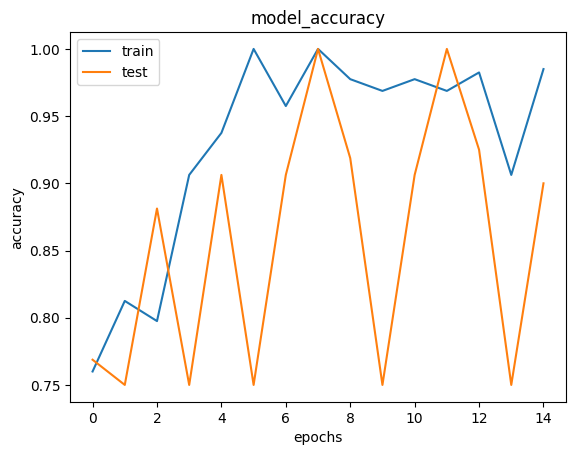

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

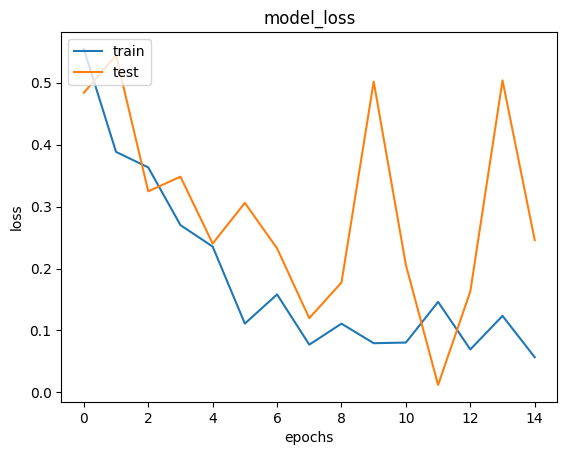

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [20]:
model_final.save('model_final.h5')

In [21]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [22]:
class_dictionary

{0: 'no_car', 1: 'car'}

In [23]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
    img = np.expand_dims(img, axis = 0)
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [24]:
make_prediction("roi_1.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


'car'

In [25]:
make_prediction("roi_30.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'no_car'